In [1]:
%pylab inline
from utils import *
from data import *
from scoring import *

Populating the interactive namespace from numpy and matplotlib


# Some general notes

* The data has been perpared by running add_measures.py, which adds avg and stddev of speed and course for various sizes of a rolling window (from 30min to 24h).

* **We use a random forests**

* We determine, for each gear type, what the optimal window size is by running the regression for each window size and a fixed polynomial degree.


# Longliners
## Longliners using Alex' data
Train the algorithm using Alex' data, then evaluate on both Alex' and Kristinas data

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0258534778863, cross=0.177136172027
3600: Fitting... Scoring... Calc.err... train=0.0248223934839, cross=0.170813347867
10800: Fitting... Scoring... Calc.err... train=0.0190454151953, cross=0.153696140385
21600: Fitting... Scoring... Calc.err... train=0.0168377968398, cross=0.146388679031
43200: Fitting... Scoring... Calc.err... train=0.0161597441306, cross=0.1461798254
86400: Fitting... Scoring... Calc.err... train=0.0165364345056, cross=0.153173805622


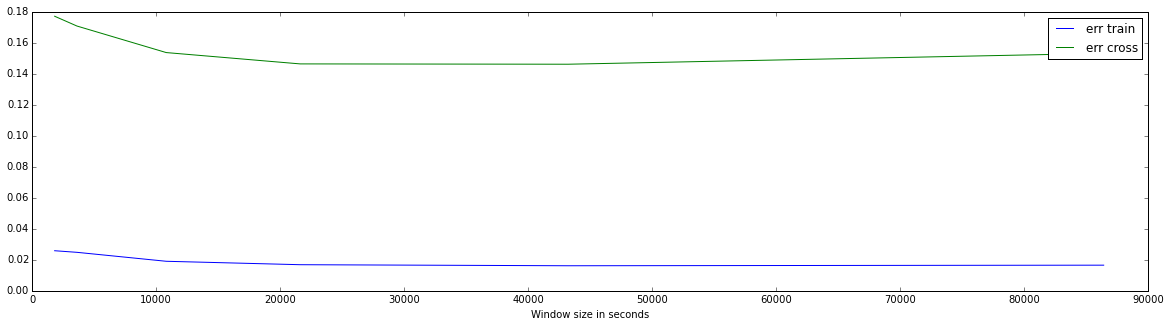

Best window size: 43200
Evaluation using Alex' data:


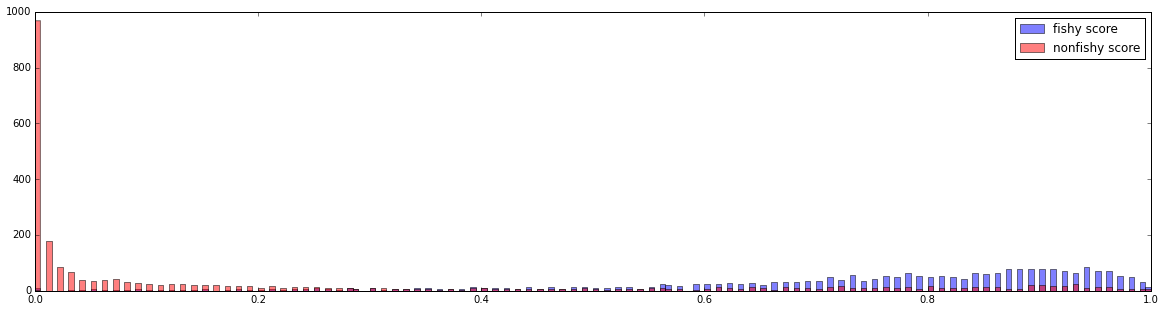

Squared numerical error: 0.12387306
Error (overlap): 31.28%
Error (overlap) above cutoff of 0.5: 38.8950276243%
For cutoff of 0.5
True positives 1991
False positives 528
True negatives 1972
False negatives 264
accuracy 0.7926
precision 0.7903930131
recall 0.882926829268


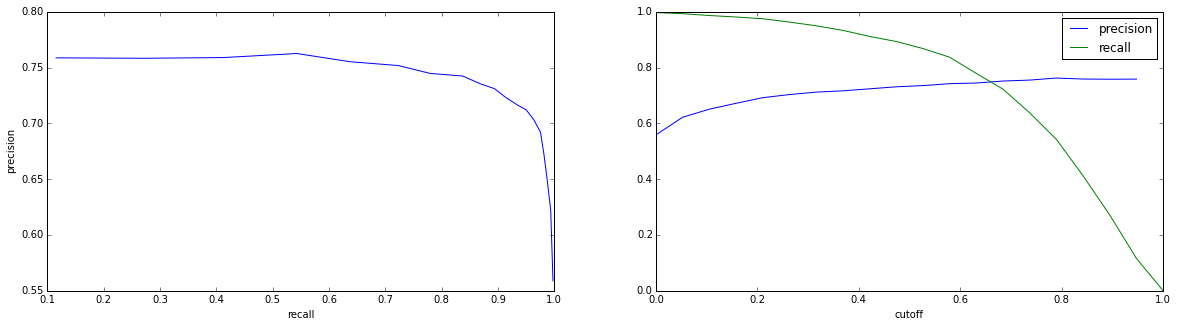

Score window: [43200]
Evaluate using Kristinas data:


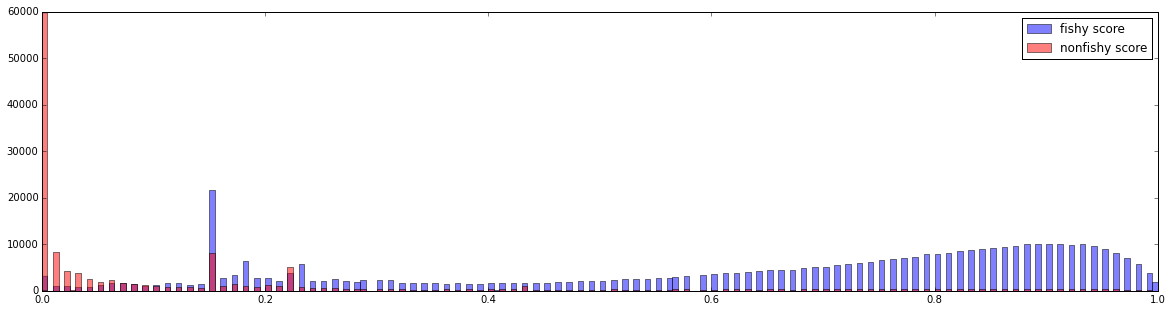

Squared numerical error: 0.181097949355
Error (overlap): 22.3376833174%
Error (overlap) above cutoff of 0.5: 10.3209662025%
For cutoff of 0.5
True positives 310019
False positives 16869
True negatives 121610
False negatives 121006
accuracy 0.757903368545
precision 0.948395168988
recall 0.719259903718


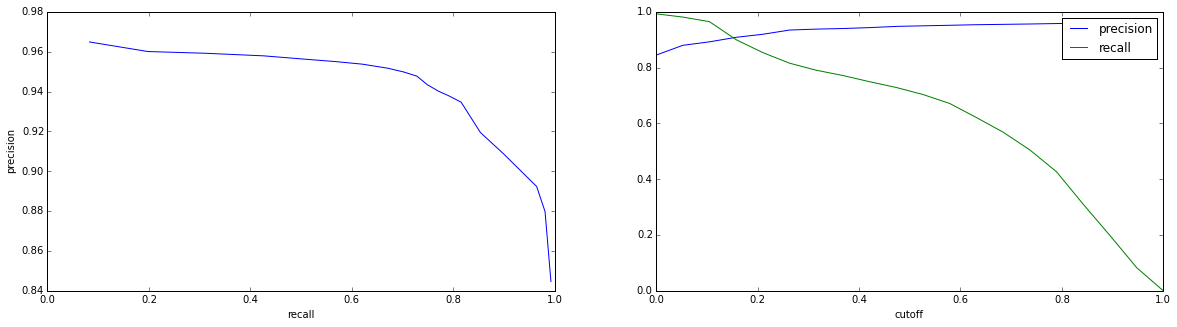

Score window: [43200]


In [2]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('classified-filtered.npz')
_x, _xtrain, _xcross, _xtest = load_dataset_by_vessel(
                                    'datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
print "Evaluation using Alex' data:"
evaluate_score(xtrain, xtest, [min_window])
print "Evaluate using Kristinas data:"
evaluate_score(xtrain, _x, [min_window])

# Longliners using Kristinas' data
Train the algorithm using Kristinas data, and evaluate using a separate subset of Kristinas data.

In [3]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.031782623477, cross=0.151907028642
3600: Fitting... Scoring... Calc.err... train=0.0273426263847, cross=0.151588995065
10800: Fitting... Scoring... Calc.err... train=0.0172935703274, cross=0.140571314232
21600: Fitting... Scoring... Calc.err... train=0.0146348620123, cross=0.131724698987
43200: Fitting... Scoring... Calc.err... train=0.0126552588733, cross=0.106942754082
86400: Fitting... Scoring... Calc.err... train=0.0116937674389, cross=0.11980998


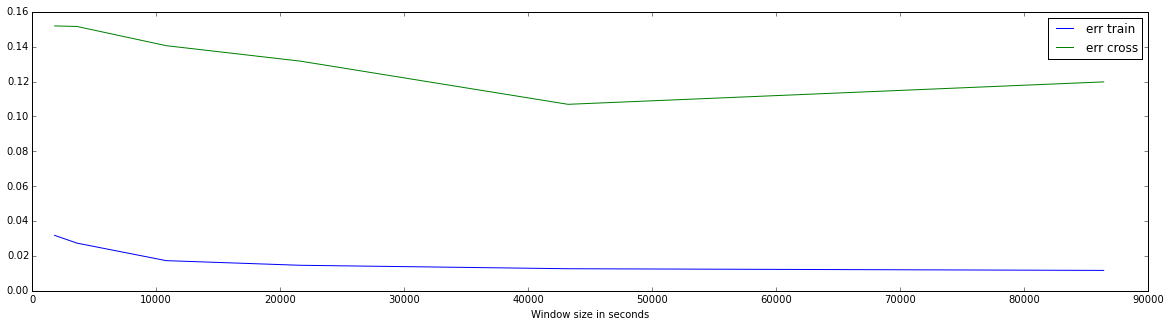

Best window size: 43200


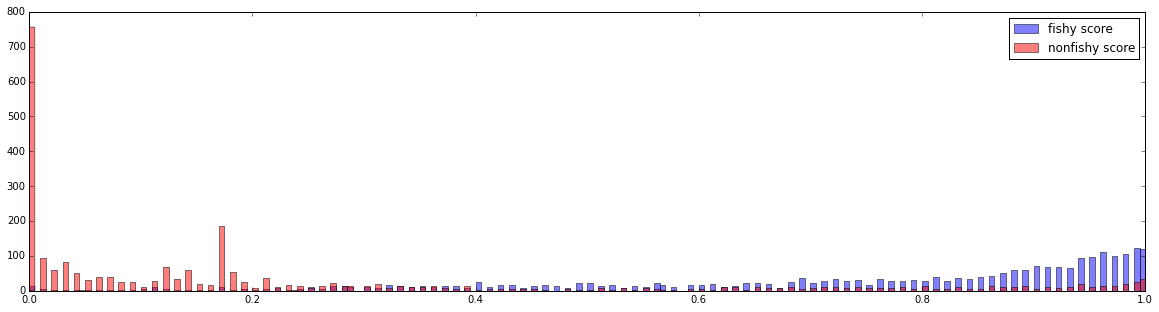

Squared numerical error: 0.132269609869
Error (overlap): 30.4%
Error (overlap) above cutoff of 0.5: 36.8233899644%
For cutoff of 0.5
True positives 2063
False positives 468
True negatives 2032
False negatives 437
accuracy 0.819
precision 0.815092848676
recall 0.8252


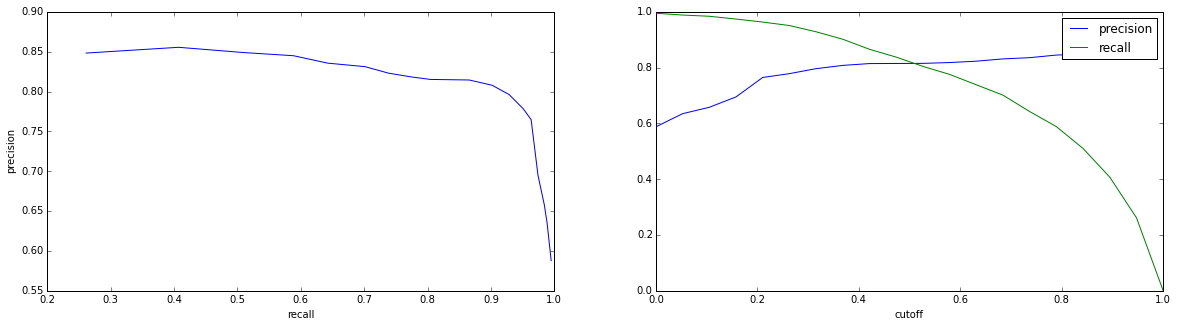

Score window: [43200]


In [4]:
min_window = optimize_window_size(xtrain, xcross)
evaluate_score(xtrain, xtest, [min_window])

Fitting an optimal window size set for avg/stddev columns
For now uses a set from minimum window size up to X
[1800]: Fitting... Scoring... Calc.err... train=0.027, cross=0.2046
[1800, 3600]: Fitting... Scoring... Calc.err... train=0.0205, cross=0.2028
[1800, 3600, 10800]: Fitting... Scoring... Calc.err... train=0.0064, cross=0.1784
[1800, 3600, 10800, 21600]: Fitting... Scoring... Calc.err... train=0.0032, cross=0.1646
[1800, 3600, 10800, 21600, 43200]: Fitting... Scoring... Calc.err... train=0.0003, cross=0.119
[1800, 3600, 10800, 21600, 43200, 86400]: Fitting... Scoring... Calc.err... train=0.0001, cross=0.1052


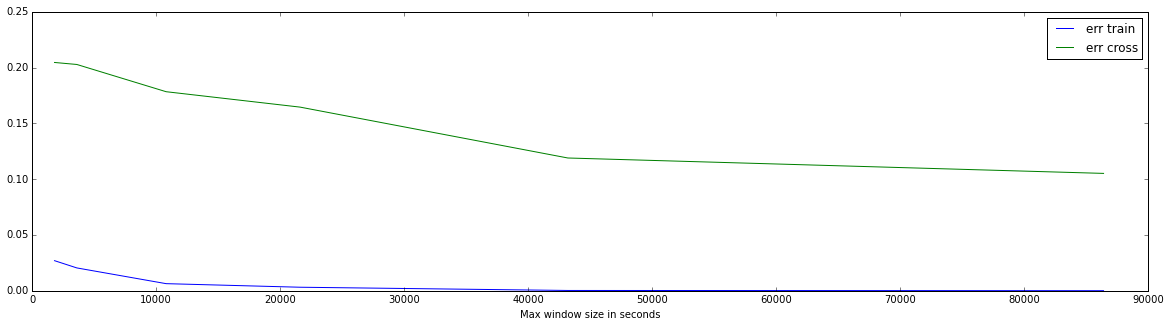

Best window sizes: [1800, 3600, 10800, 21600, 43200, 86400]


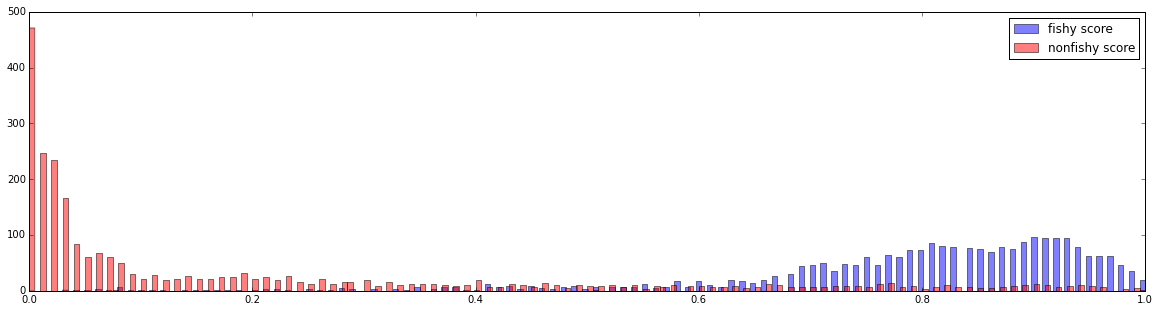

Squared numerical error: 0.0874889286056
Error (overlap): 10.8%
Error (overlap) above cutoff of 0.5: 11.1070515163%
For cutoff of 0.5
True positives 2348
False positives 383
True negatives 2117
False negatives 152
accuracy 0.893
precision 0.859758330282
recall 0.9392


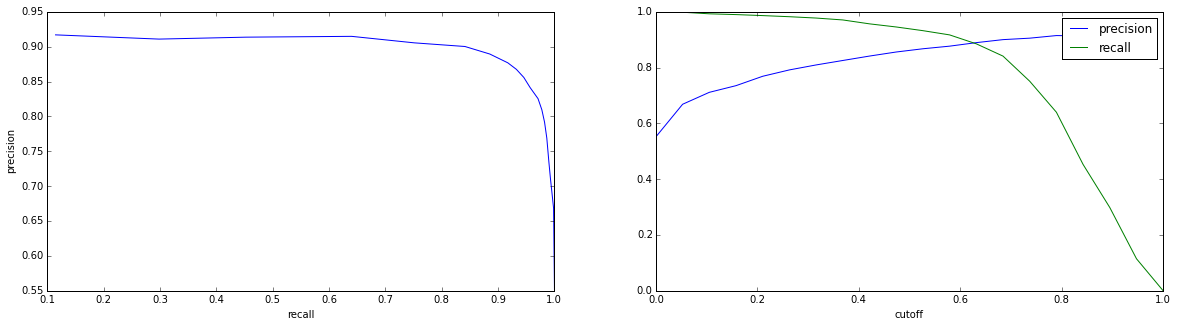

Score window: [1800, 3600, 10800, 21600, 43200, 86400]


In [5]:
best_windows = optimize_multi_window_sizes(xtrain, xcross)
evaluate_score(xtrain, xtest, best_windows)

# Diferences between the datasets
How does the two labeled datasets differ in their labeleing? Alex only has labeled data for longliners, so that's what we'll compare:

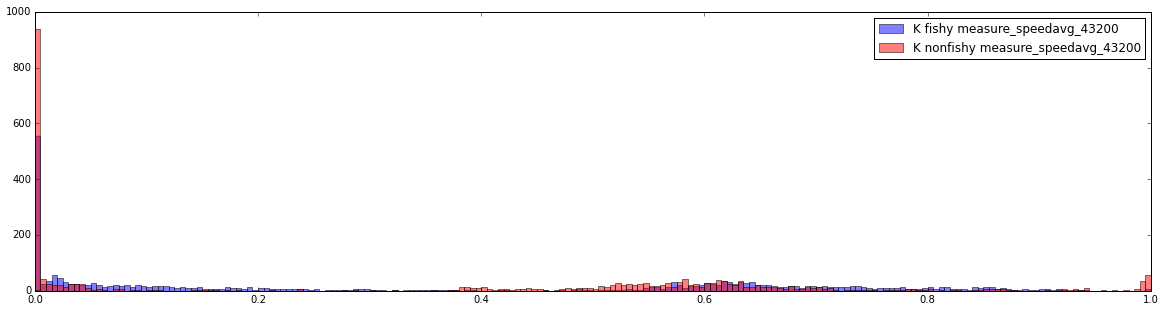

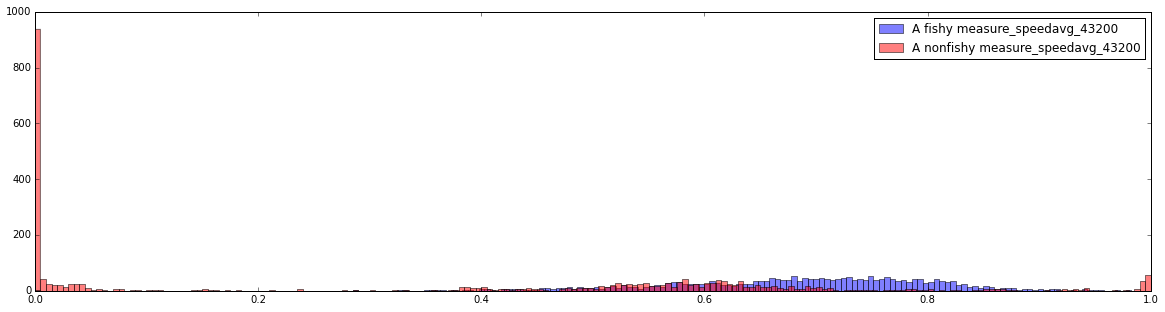

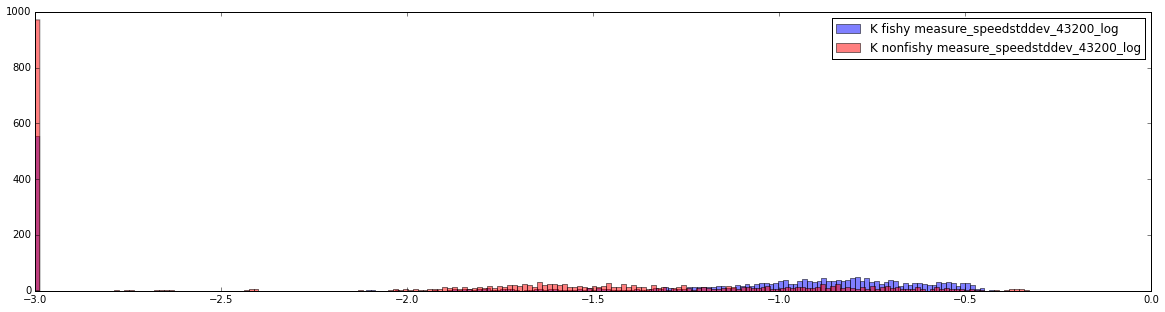

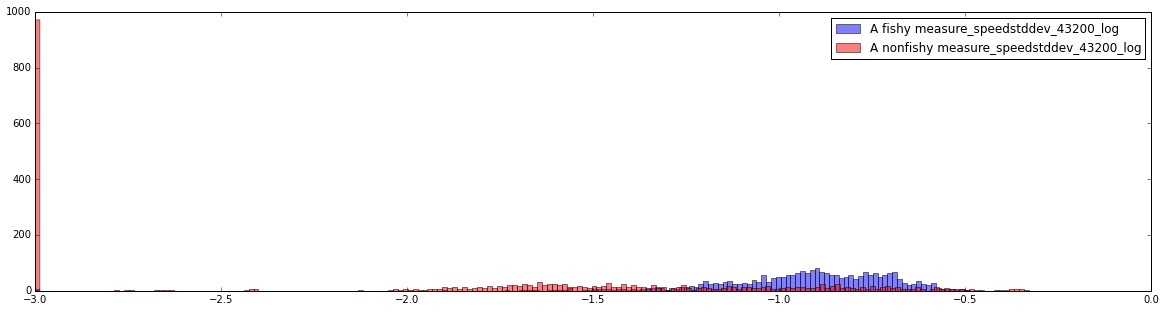

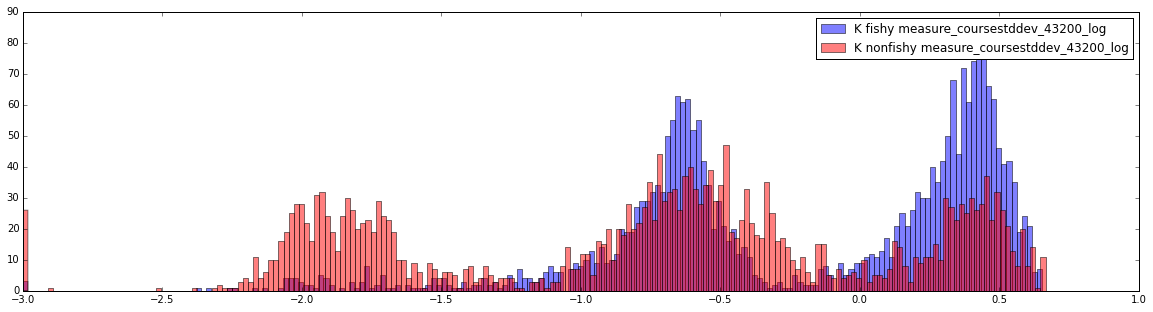

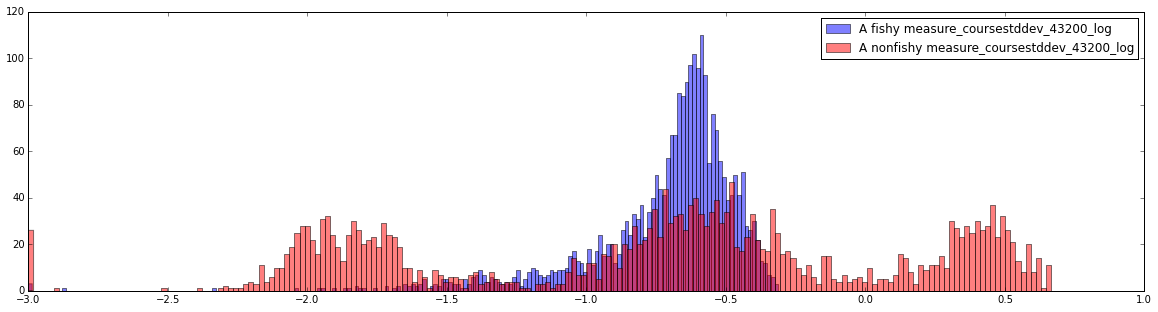

In [6]:
_x, _xtrain, _xcross, _xtest = load_dataset_by_vessel('classified-filtered.npz')
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')

xfishy = fishy(xtest)
xnonfishy = nonfishy(xtest)
_xfishy = fishy(_xtest)
_xnonfishy = nonfishy(xtest)
window = 43200
for col in ('measure_speedavg_%s' % window,
        'measure_speedstddev_%s_log' % window,
        'measure_coursestddev_%s_log' % window):
    figure(figsize=(20,5))
    hist(xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="K fishy " + col)
    hist(xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="K nonfishy " + col)
    legend()
    show()

    figure(figsize=(20,5))
    hist(_xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="A fishy " + col)
    hist(_xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="A nonfishy " + col)
    legend()
    show()

# Trawlers

In [7]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_trawl.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0185013956366, cross=0.126383422737
3600: Fitting... Scoring... Calc.err... train=0.0158063190726, cross=0.12348579182
10800: Fitting... Scoring... Calc.err... train=0.00973330684919, cross=0.130152087283
21600: Fitting... Scoring... Calc.err... train=0.00891064098889, cross=0.137509528561
43200: Fitting... Scoring... Calc.err... train=0.00920011, cross=0.15068074
86400: Fitting... Scoring... Calc.err... train=0.00975188, cross=0.16929702


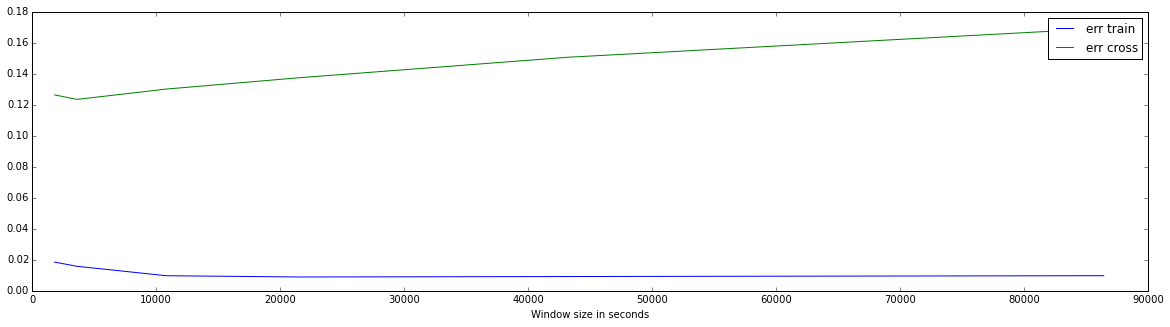

Best window size: 3600


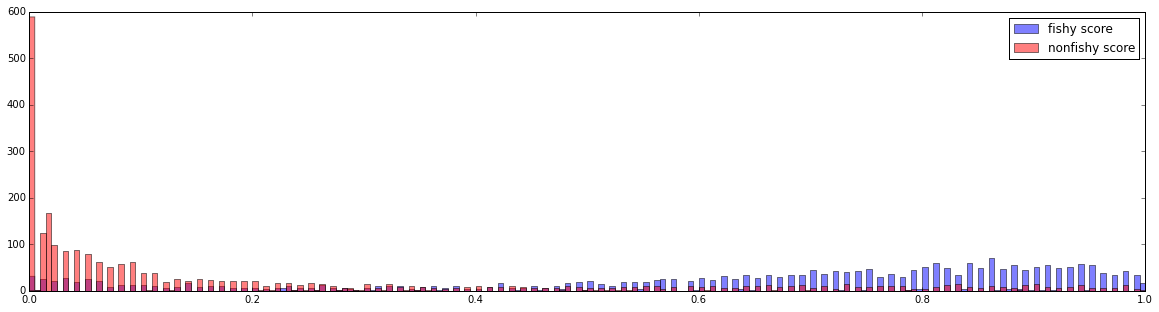

Squared numerical error: 0.158157995928
Error (overlap): 37.8%
Error (overlap) above cutoff of 0.5: 36.7845117845%
For cutoff of 0.5
True positives 1931
False positives 445
True negatives 2055
False negatives 569
accuracy 0.7972
precision 0.81271043771
recall 0.7724


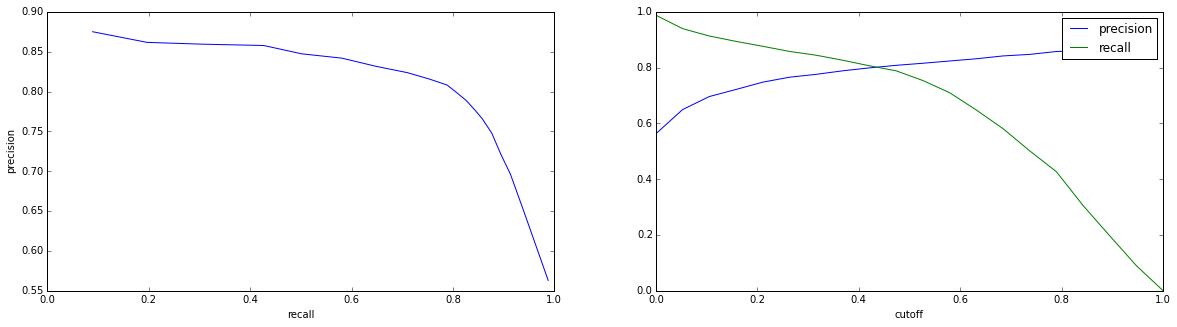

Score window: [3600]


In [8]:
min_window = optimize_window_size(xtrain, xcross)
evaluate_score(xtrain, xtest, [min_window])

Fitting an optimal window size set for avg/stddev columns
For now uses a set from minimum window size up to X
[1800]: Fitting... Scoring... Calc.err... train=0.0155, cross=0.1558
[1800, 3600]: Fitting... Scoring... Calc.err... train=0.0114, cross=0.1544
[1800, 3600, 10800]: Fitting... Scoring... Calc.err... train=0.0017, cross=0.1524
[1800, 3600, 10800, 21600]: Fitting... Scoring... Calc.err... train=0.0004, cross=0.1468
[1800, 3600, 10800, 21600, 43200]: Fitting... Scoring... Calc.err... train=0.0, cross=0.1458
[1800, 3600, 10800, 21600, 43200, 86400]: Fitting... Scoring... Calc.err... train=0.0, cross=0.1476


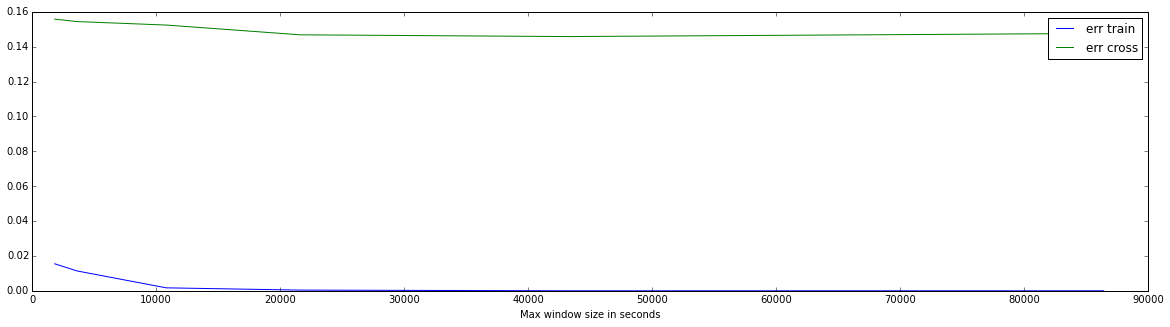

Best window sizes: [1800, 3600, 10800, 21600, 43200]


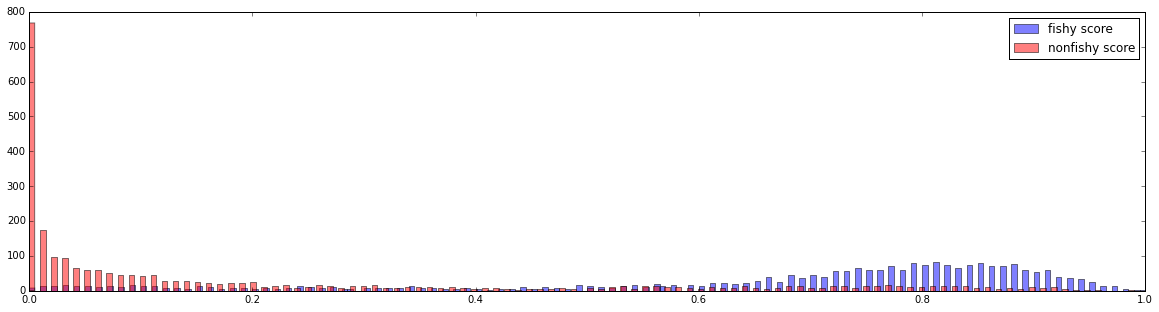

Squared numerical error: 0.14046454
Error (overlap): 18.0%
Error (overlap) above cutoff of 0.5: 1.9269369731%
For cutoff of 0.5
True positives 2030
False positives 461
True negatives 2039
False negatives 470
accuracy 0.8138
precision 0.814933761542
recall 0.812


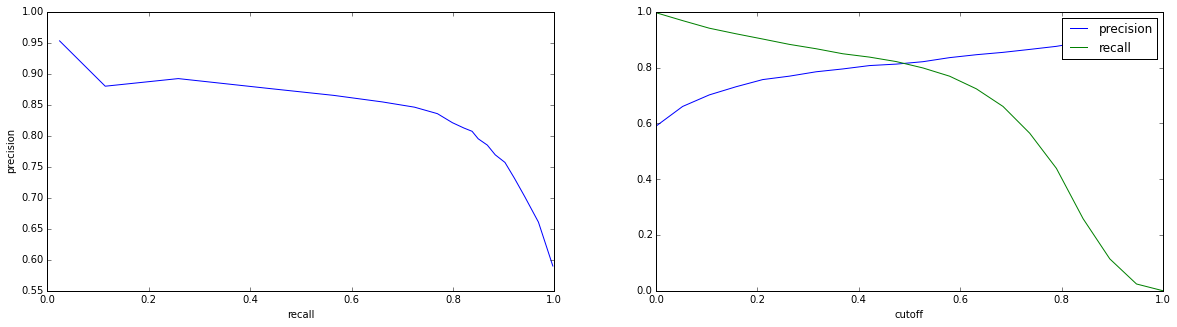

Score window: [1800, 3600, 10800, 21600, 43200]


In [9]:
best_windows = optimize_multi_window_sizes(xtrain, xcross)
evaluate_score(xtrain, xtest, best_windows)

# Purse seiners

In [10]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_ps.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0144948100952, cross=0.114043207256
3600: Fitting... Scoring... Calc.err... train=0.0133868445588, cross=0.115756788297
10800: Fitting... Scoring... Calc.err... train=0.0103029949043, cross=0.159649506757
21600: Fitting... Scoring... Calc.err... train=0.00978454065724, cross=0.172805122387
43200: Fitting... Scoring... Calc.err... train=0.0093306846641, cross=0.236046063351
86400: Fitting... Scoring... Calc.err... train=0.00804552, cross=0.23951844


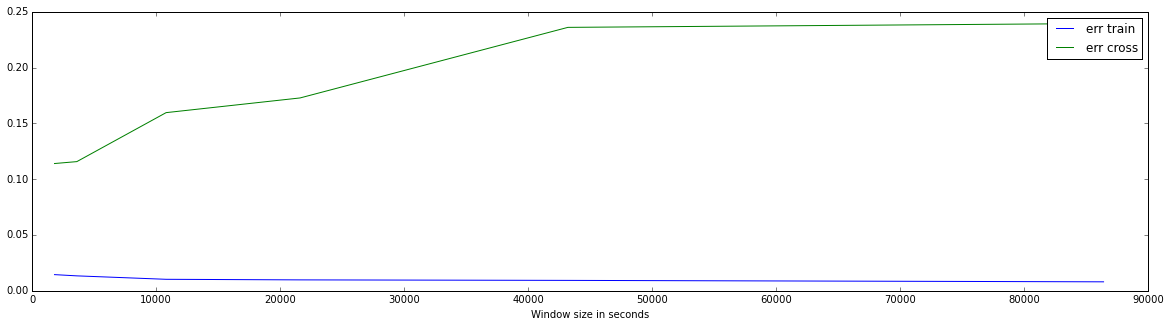

Best window size: 1800


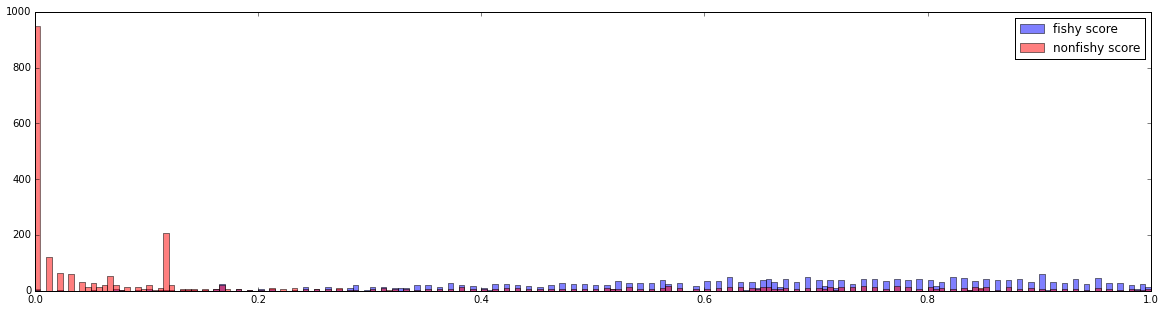

Squared numerical error: 0.151556233734
Error (overlap): 32.92%
Error (overlap) above cutoff of 0.5: 44.1926345609%
For cutoff of 0.5
True positives 1921
False positives 550
True negatives 1950
False negatives 579
accuracy 0.7742
precision 0.777418049373
recall 0.7684


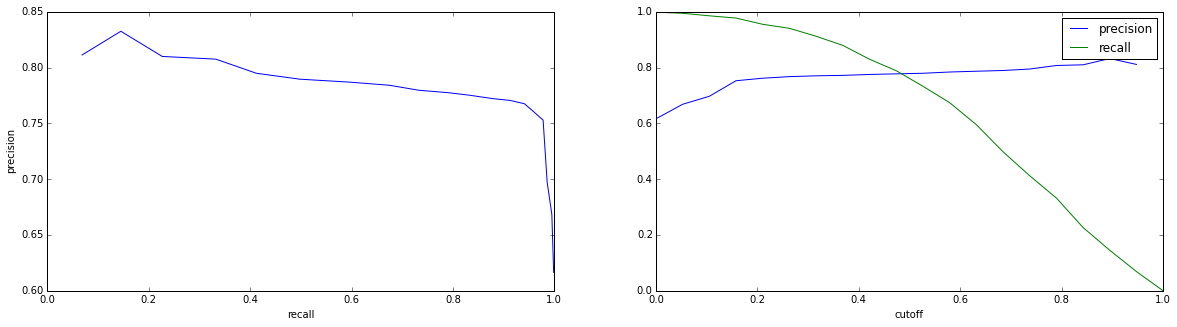

Score window: [1800]


In [11]:
import imp, scoring
imp.reload(scoring)
import graph_score
imp.reload(graph_score)
from scoring import *
from graph_score import *
min_window = optimize_window_size(xtrain, xcross)
evaluate_score(xtrain, xtest, [min_window])

Fitting an optimal window size set for avg/stddev columns
For now uses a set from minimum window size up to X
[1800]: Fitting... Scoring... Calc.err... train=0.0072, cross=0.162
[1800, 3600]: Fitting... Scoring... Calc.err... train=0.006, cross=0.1636
[1800, 3600, 10800]: Fitting... Scoring... Calc.err... train=0.0024, cross=0.1518
[1800, 3600, 10800, 21600]: Fitting... Scoring... Calc.err... train=0.0017, cross=0.1436
[1800, 3600, 10800, 21600, 43200]: Fitting... Scoring... Calc.err... train=0.0006, cross=0.1342
[1800, 3600, 10800, 21600, 43200, 86400]: Fitting... Scoring... Calc.err... train=0.0, cross=0.124


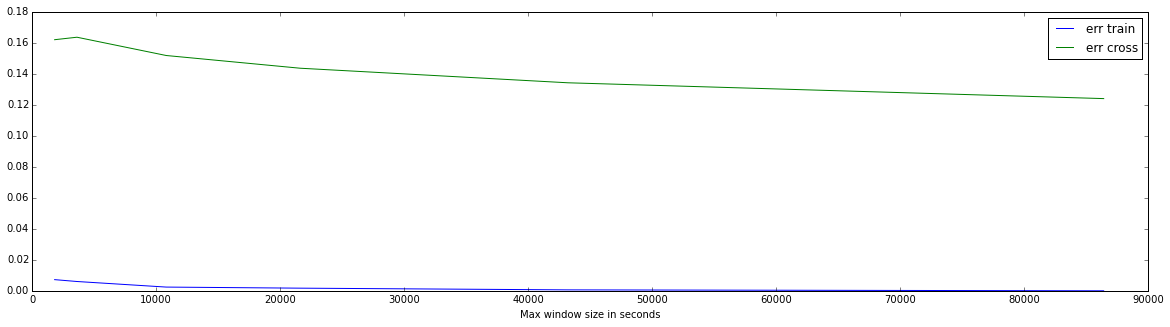

Best window sizes: [1800, 3600, 10800, 21600, 43200, 86400]


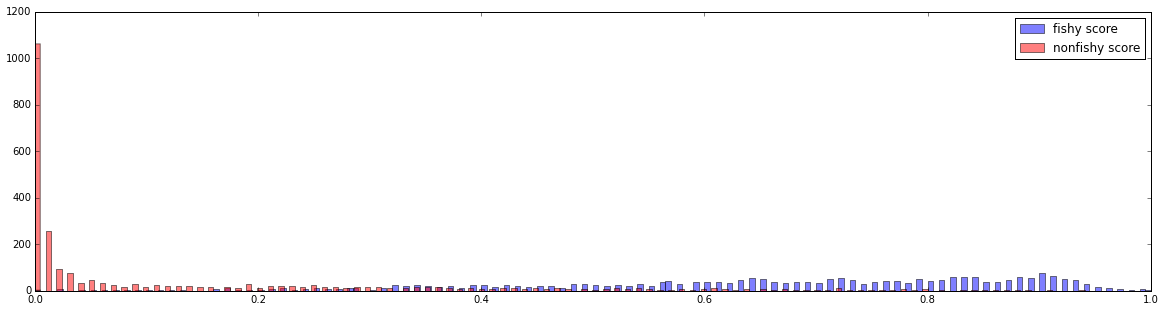

Squared numerical error: 0.11165106
Error (overlap): 13.04%
Error (overlap) above cutoff of 0.5: 8.08823529412%
For cutoff of 0.5
True positives 1944
False positives 223
True negatives 2277
False negatives 556
accuracy 0.8442
precision 0.897092754961
recall 0.7776


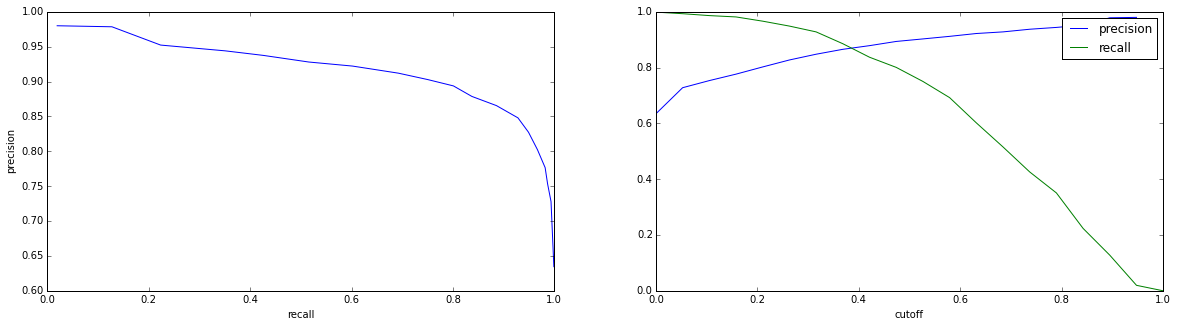

Score window: [1800, 3600, 10800, 21600, 43200, 86400]


In [12]:
import imp, scoring
imp.reload(scoring)
import graph_score
imp.reload(graph_score)
import data
imp.reload(data)
from scoring import *
from graph_score import *
from data import *
best_windows = optimize_multi_window_sizes(xtrain, xcross)
evaluate_score(xtrain, xtest, best_windows)